<a href="https://colab.research.google.com/github/natrivera/tidytuesday/blob/main/2022/2022-05-24/tidy_tuesday_22_05_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Tidy Tuesday 5-24-22 ---- Women's Rugby


Load Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

Read in data

In [36]:
sevens = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-24/sevens.csv')
fifteens = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-24/fifteens.csv')

Look at shape and structure of the sevens dataframe

In [3]:
sevens.shape

(7966, 16)

In [6]:
sevens.head()

,row_id,date,team_1,score_1,score_2,team_2,venue,tournament,stage,t1_game_no,t2_game_no,series,margin,winner,loser,notes
0,NaN,1997-03-15,New Zealand Wild Ducks,54,0,Japan,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,54.0,New Zealand Wild Ducks,Japan,NaN
1,2.0,1997-03-15,England,10,7,Australia,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,3.0,England,Australia,NaN
2,3.0,1997-03-15,Canada,31,0,Netherlands,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,31.0,Canada,Netherlands,NaN
3,4.0,1997-03-15,Hong Kong,12,5,Fiji,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,7.0,Hong Kong,Fiji,NaN
4,5.0,1997-03-15,United States,26,5,Scotland,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,21.0,United States,Scotland,NaN


In [13]:
sevens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   row_id      7964 non-null   float64
 1   date        7966 non-null   object 
 2   team_1      7966 non-null   object 
 3   score_1     7966 non-null   object 
 4   score_2     7966 non-null   object 
 5   team_2      7966 non-null   object 
 6   venue       7966 non-null   object 
 7   tournament  7966 non-null   object 
 8   stage       7779 non-null   object 
 9   t1_game_no  7966 non-null   int64  
 10  t2_game_no  7966 non-null   int64  
 11  series      7966 non-null   int64  
 12  margin      7929 non-null   float64
 13  winner      7966 non-null   object 
 14  loser       7966 non-null   object 
 15  notes       52 non-null     object 
dtypes: float64(2), int64(3), object(11)
memory usage: 995.9+ KB


Data Wrangling

In [37]:
sevens['date'] = pd.to_datetime(sevens.date)
sevens['year'] = sevens.date.dt.year
sevens['df'] = 'sevens'
sevens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   row_id      7964 non-null   float64       
 1   date        7966 non-null   datetime64[ns]
 2   team_1      7966 non-null   object        
 3   score_1     7966 non-null   object        
 4   score_2     7966 non-null   object        
 5   team_2      7966 non-null   object        
 6   venue       7966 non-null   object        
 7   tournament  7966 non-null   object        
 8   stage       7779 non-null   object        
 9   t1_game_no  7966 non-null   int64         
 10  t2_game_no  7966 non-null   int64         
 11  series      7966 non-null   int64         
 12  margin      7929 non-null   float64       
 13  winner      7966 non-null   object        
 14  loser       7966 non-null   object        
 15  notes       52 non-null     object        
 16  year        7966 non-nul

In [30]:
sevens.head()

,row_id,date,team_1,score_1,score_2,team_2,venue,tournament,stage,t1_game_no,t2_game_no,series,margin,winner,loser,notes,year,df
0,NaN,1997-03-15,New Zealand Wild Ducks,54,0,Japan,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,54.0,New Zealand Wild Ducks,Japan,NaN,1997,sevens
1,2.0,1997-03-15,England,10,7,Australia,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,3.0,England,Australia,NaN,1997,sevens
2,3.0,1997-03-15,Canada,31,0,Netherlands,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,31.0,Canada,Netherlands,NaN,1997,sevens
3,4.0,1997-03-15,Hong Kong,12,5,Fiji,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,7.0,Hong Kong,Fiji,NaN,1997,sevens
4,5.0,1997-03-15,United States,26,5,Scotland,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,21.0,United States,Scotland,NaN,1997,sevens


In [10]:
sevens.groupby(['stage'])['row_id'].count()

stage
11th Place Match              101
11th place match                8
13th Place Match                5
13th place match                3
13th-15th Place Semi-Final      1
                             ... 
Quarter-Final                 495
Semi-Final                    479
Series                          3
Shield Final                    1
Shield semi-final               2
Name: row_id, Length: 125, dtype: int64

Look at shape and structure of fifteens dataframe

In [5]:
fifteens.shape

(1468, 15)

In [7]:
fifteens.head()

,test_no,date,team_1,score_1,score_2,team_2,venue,home_test_no,away_test_no,series_no,tournament,margin_of_victory,home_away_win,winner,loser
0,1,1982-06-13,Netherlands,0,4,France,Utrecht,1,1,1,Friendly,4,A,France,Netherlands
1,2,1983-06-05,France,10,0,Netherlands,La Teste,2,2,2,Friendly,10,H,France,Netherlands
2,3,1984-05-27,Netherlands,0,3,France,Hilversum,3,3,3,Friendly,3,A,France,Netherlands
3,4,1984-12-31,Sweden,0,34,Netherlands,Malmö,1,4,1,Friendly,34,A,Netherlands,Sweden
4,5,1985-06-02,France,20,0,Netherlands,Bourg en Bresse,4,5,4,Friendly,20,H,France,Netherlands


In [92]:
fifteens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   test_no            1468 non-null   int64         
 1   date               1468 non-null   datetime64[ns]
 2   team_1             1468 non-null   object        
 3   score_1            1468 non-null   int64         
 4   score_2            1468 non-null   int64         
 5   team_2             1468 non-null   object        
 6   venue              1468 non-null   object        
 7   home_test_no       1468 non-null   int64         
 8   away_test_no       1468 non-null   int64         
 9   series_no          1468 non-null   int64         
 10  tournament         1468 non-null   object        
 11  margin_of_victory  1468 non-null   int64         
 12  home_away_win      1468 non-null   object        
 13  winner             1468 non-null   object        
 14  loser   

Data wrangling

In [38]:
fifteens['date'] = pd.to_datetime(fifteens['date'])
fifteens['year'] = fifteens.date.dt.year
fifteens['df'] = 'fifteens'
fifteens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   test_no            1468 non-null   int64         
 1   date               1468 non-null   datetime64[ns]
 2   team_1             1468 non-null   object        
 3   score_1            1468 non-null   int64         
 4   score_2            1468 non-null   int64         
 5   team_2             1468 non-null   object        
 6   venue              1468 non-null   object        
 7   home_test_no       1468 non-null   int64         
 8   away_test_no       1468 non-null   int64         
 9   series_no          1468 non-null   int64         
 10  tournament         1468 non-null   object        
 11  margin_of_victory  1468 non-null   int64         
 12  home_away_win      1468 non-null   object        
 13  winner             1468 non-null   object        
 14  loser   

In [28]:
fifteens.head()

,test_no,date,team_1,score_1,score_2,team_2,venue,home_test_no,away_test_no,series_no,tournament,margin_of_victory,home_away_win,winner,loser,year,df
0,1,1982-06-13,Netherlands,0,4,France,Utrecht,1,1,1,Friendly,4,A,France,Netherlands,1982,fifteens
1,2,1983-06-05,France,10,0,Netherlands,La Teste,2,2,2,Friendly,10,H,France,Netherlands,1983,fifteens
2,3,1984-05-27,Netherlands,0,3,France,Hilversum,3,3,3,Friendly,3,A,France,Netherlands,1984,fifteens
3,4,1984-12-31,Sweden,0,34,Netherlands,Malmö,1,4,1,Friendly,34,A,Netherlands,Sweden,1984,fifteens
4,5,1985-06-02,France,20,0,Netherlands,Bourg en Bresse,4,5,4,Friendly,20,H,France,Netherlands,1985,fifteens


EDA

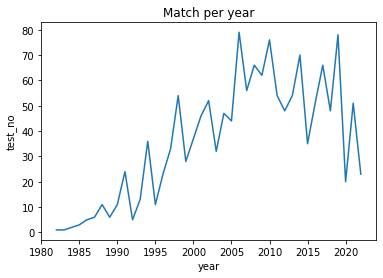

In [96]:
year_tot = fifteens.groupby(['year']).count()
sns.lineplot( data = year_tot , x = 'year' , y = 'test_no' )
plt.title("Match per year")
plt.show()

In [50]:
home_15 = fifteens.copy()[['year' , 'date' , 'team_1' , 'score_1' , 'home_away_win' , 'venue'  , 'tournament' , 'test_no']]
home_15['home'] = True
home_15['win'] = np.where(home_15.home_away_win == 'H' , True , False)
home_15 = home_15.rename(columns={"team_1": "team", "score_1": "score"})
home_15.head()

,year,date,team,score,home_away_win,venue,tournament,test_no,home,win
0,1982,1982-06-13,Netherlands,0,A,Utrecht,Friendly,1,True,False
1,1983,1983-06-05,France,10,H,La Teste,Friendly,2,True,True
2,1984,1984-05-27,Netherlands,0,A,Hilversum,Friendly,3,True,False
3,1984,1984-12-31,Sweden,0,A,Malmö,Friendly,4,True,False
4,1985,1985-06-02,France,20,H,Bourg en Bresse,Friendly,5,True,True


In [51]:
away_15 = fifteens.copy()[['year' , 'date' , 'team_2' , 'score_2' , 'home_away_win' , 'venue' , 'tournament' , 'test_no']]
away_15['home'] = False
away_15['win'] = np.where(away_15.home_away_win == 'A' , True , False)
away_15 = away_15.rename(columns={"team_2": "team", "score_2": "score"})
away_15.head()

,year,date,team,score,home_away_win,venue,tournament,test_no,home,win
0,1982,1982-06-13,France,4,A,Utrecht,Friendly,1,False,True
1,1983,1983-06-05,Netherlands,0,H,La Teste,Friendly,2,False,False
2,1984,1984-05-27,France,3,A,Hilversum,Friendly,3,False,True
3,1984,1984-12-31,Netherlands,34,A,Malmö,Friendly,4,False,True
4,1985,1985-06-02,Netherlands,0,H,Bourg en Bresse,Friendly,5,False,False


In [83]:
fifteen_long = pd.concat([home_15 , away_15]).sort_values(by=['test_no'])
fifteen_long.head()

,year,date,team,score,home_away_win,venue,tournament,test_no,home,win
0,1982,1982-06-13,Netherlands,0,A,Utrecht,Friendly,1,True,False
0,1982,1982-06-13,France,4,A,Utrecht,Friendly,1,False,True
1,1983,1983-06-05,Netherlands,0,H,La Teste,Friendly,2,False,False
1,1983,1983-06-05,France,10,H,La Teste,Friendly,2,True,True
2,1984,1984-05-27,Netherlands,0,A,Hilversum,Friendly,3,True,False


In [84]:
fifteen_long.groupby(['team'])['test_no'].count().sort_values()

team
Guatemala        1
El Salvador      1
Venezuela        1
Tunisia          2
Malaysia         2
              ... 
Ireland        187
Scotland       214
Wales          215
France         256
England        296
Name: test_no, Length: 73, dtype: int64

In [85]:
team_avg_15 = fifteen_long.copy().groupby(['team' ,  'year'])['score'].mean().reset_index().rename(columns={"score": "avg_score"})
team_avg_15.head()

,team,year,avg_score
0,Australia,1994,0.0
1,Australia,1995,0.0
2,Australia,1996,5.0
3,Australia,1997,12.0
4,Australia,1998,14.5


In [87]:
fifteen_long = fifteen_long.merge(team_avg_15 , on=['team' ,  'year'] , how='left')
fifteen_long['score_delta'] = fifteen_long.score - fifteen_long.avg_score
fifteen_long.head()

,year,date,team,score,home_away_win,venue,tournament,test_no,home,win,avg_score,score_delta
0,1982,1982-06-13,Netherlands,0,A,Utrecht,Friendly,1,True,False,0.0,0.0
1,1982,1982-06-13,France,4,A,Utrecht,Friendly,1,False,True,4.0,0.0
2,1983,1983-06-05,Netherlands,0,H,La Teste,Friendly,2,False,False,0.0,0.0
3,1983,1983-06-05,France,10,H,La Teste,Friendly,2,True,True,10.0,0.0
4,1984,1984-05-27,Netherlands,0,A,Hilversum,Friendly,3,True,False,17.0,-17.0


Calculate the effect of playing at home vs away

In [90]:
home_delta_15 = fifteen_long.groupby(['home'])['score_delta'].mean()
home_delta_15.head()

home
False   -1.674875
True     1.674875
Name: score_delta, dtype: float64

In [102]:
team_avg_15.sort_values(by=['avg_score'] ,  ascending=False)

,team,year,avg_score,matches
10,Australia,2009,87.00,1
643,Uganda,2005,86.50,2
428,New Zealand,1996,78.25,4
662,United States,1994,77.40,5
689,Venezuela,2001,76.00,1
...,...,...,...,...
642,USSR,1991,0.00,3
673,United States,2007,0.00,1
698,Wales,1995,0.00,1
731,Zimbabwe,2007,0.00,1


In [112]:
yr_avg_15 = fifteen_long.copy().groupby(['year']).agg({'score':'mean'}).reset_index().rename(columns={'score':'yr_avg_score_all'})
yr_avg_15.head()

,year,yr_avg_score_all
0,1982,2.00
1,1983,5.00
2,1984,9.25
3,1985,6.50
4,1986,9.30


In [115]:
team_avg_15 = fifteen_long.copy().groupby(['team' ,  'year']).agg({'score':'mean' , 'test_no':'count'}).reset_index()
team_avg_15 = team_avg_15.rename(columns={'score':'avg_score' , 'test_no':'matches'})
team_avg_15 = team_avg_15.merge(yr_avg_15 , on=['year'] , how='left')
team_avg_15['points_above_all'] = team_avg_15.avg_score - team_avg_15.yr_avg_score_all

team_avg_15 = team_avg_15.sort_values(by=['points_above_all'] ,  ascending=False )
team_avg_15[team_avg_15['matches'] > 4].head(20)

,team,year,avg_score,matches,yr_avg_score_all,points_above_all
662,United States,1994,77.400000,5,19.166667,58.233333
430,New Zealand,1998,61.833333,6,21.694444,40.138889
141,England,2022,56.400000,5,23.086957,33.313043
580,Spain,2016,46.400000,5,20.000000,26.400000
446,New Zealand,2014,46.888889,9,20.571429,26.317460
140,England,2021,48.125000,8,22.313725,25.811275
413,Netherlands,2010,42.500000,6,18.486842,24.013158
449,New Zealand,2017,49.000000,8,25.136364,23.863636
124,England,2005,44.222222,9,20.488636,23.733586
438,New Zealand,2006,40.400000,5,17.791139,22.608861


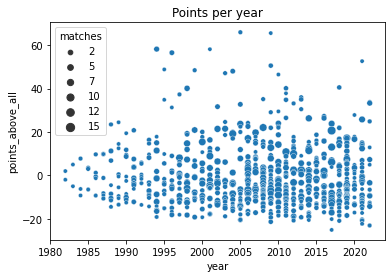

In [123]:
sns.scatterplot( data = team_avg_15 , x = 'year' , y = 'points_above_all' , size='matches')
plt.title("Points per year")
plt.show()

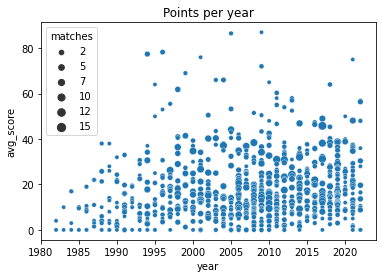

In [124]:
sns.scatterplot( data = team_avg_15 , x = 'year' , y = 'avg_score' , size='matches')
plt.title("Points per year")
plt.show()

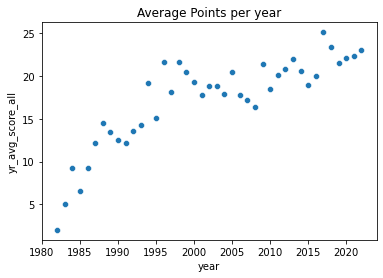

In [122]:
sns.scatterplot( data = yr_avg_15 , x = 'year' , y = 'yr_avg_score_all' )
plt.title("Average Points per year")
plt.show()

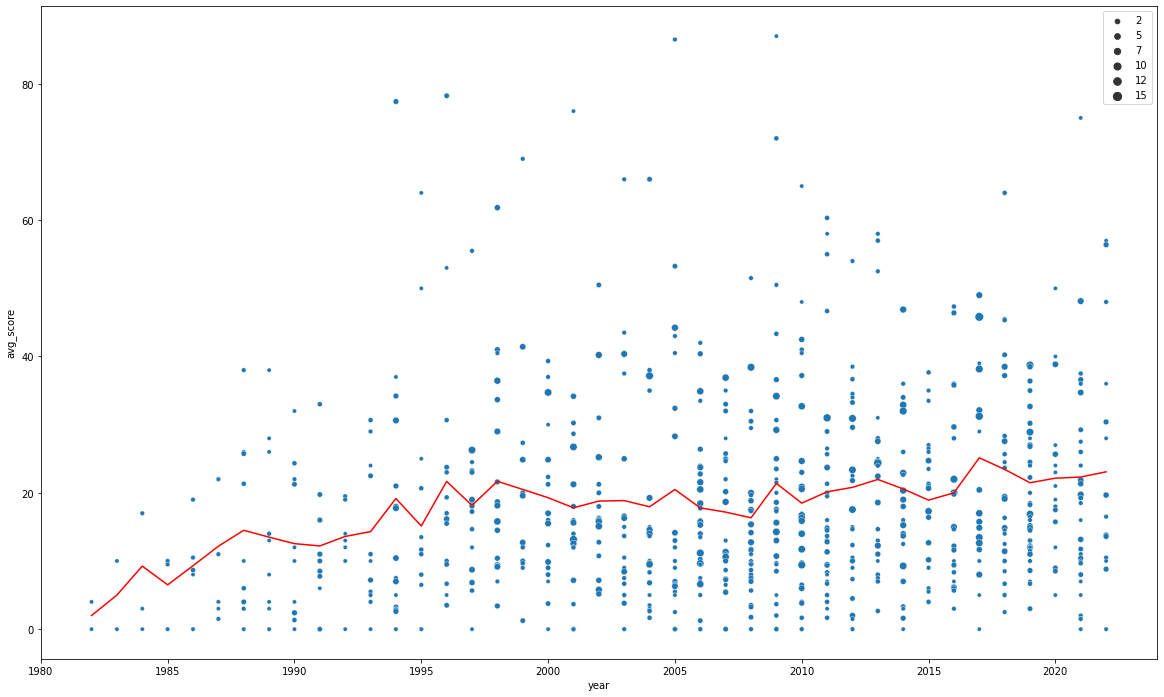

In [130]:
fig, ax = plt.subplots(figsize=(20, 12))
p1 = sns.scatterplot(data=team_avg_15, x='year', y='avg_score' , size='matches', ax=ax)
p2 = sns.lineplot(data=yr_avg_15, x='year', y='yr_avg_score_all', color='r', ax=ax)

Text(0.5, 1.0, "Team's Averge Score (Scatter) vs Moving Average for all Teams (Line)")

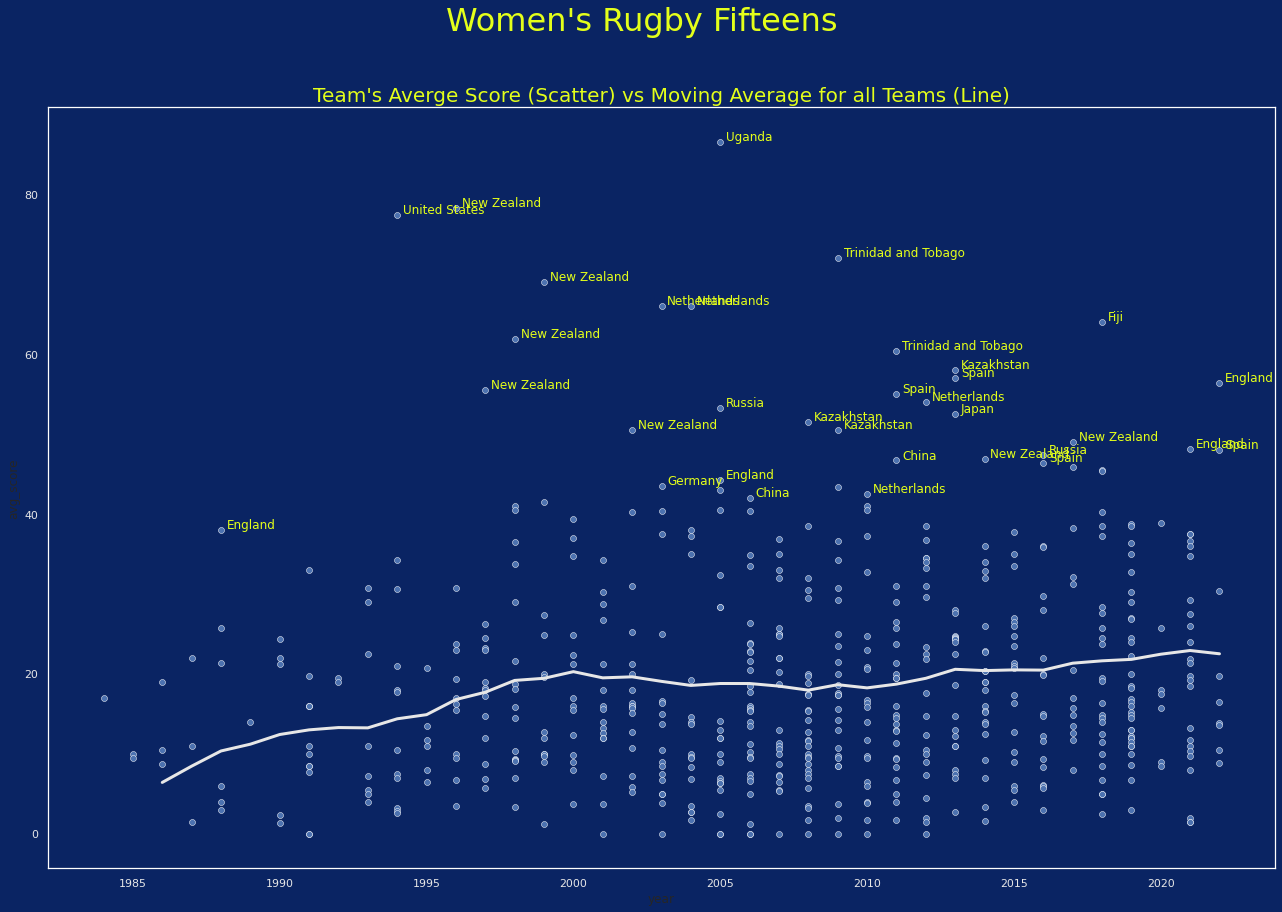

In [178]:
fifteens = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-24/fifteens.csv')

fifteens['date'] = pd.to_datetime(fifteens['date'])
fifteens['year'] = fifteens.date.dt.year
fifteens['df'] = 'fifteens'

home_15 = fifteens.copy()[['year' , 'date' , 'team_1' , 'score_1' , 'home_away_win' , 'venue'  , 'tournament' , 'test_no']]
home_15['home'] = True
home_15['win'] = np.where(home_15.home_away_win == 'H' , True , False)
home_15 = home_15.rename(columns={"team_1": "team", "score_1": "score"})

away_15 = fifteens.copy()[['year' , 'date' , 'team_2' , 'score_2' , 'home_away_win' , 'venue' , 'tournament' , 'test_no']]
away_15['home'] = False
away_15['win'] = np.where(away_15.home_away_win == 'A' , True , False)
away_15 = away_15.rename(columns={"team_2": "team", "score_2": "score"})

fifteen_long = pd.concat([home_15 , away_15]).sort_values(by=['test_no'])

team_avg_15 = fifteen_long.copy().groupby(['team' ,  'year']).agg({'score':'mean' , 'test_no':'count'}).reset_index()
team_avg_15 = team_avg_15.rename(columns={'score':'avg_score' , 'test_no':'matches'})
team_avg_15 = team_avg_15.merge(yr_avg_15 , on=['year'] , how='left')
team_avg_15['points_above_all'] = team_avg_15.avg_score - team_avg_15.yr_avg_score_all

team_avg_15 = team_avg_15.sort_values(by=['points_above_all'] ,  ascending=False )
team_avg_15 = team_avg_15[team_avg_15['matches'] > 1]


yr_avg_15 = fifteen_long.copy().groupby(['year']).agg({'score':'mean'}).reset_index().rename(columns={'score':'yr_avg_score_all'})
yr_avg_15['ma'] = yr_avg_15.yr_avg_score_all.rolling(5).mean()

# change seaborn figure settings
sns.set(rc={'axes.facecolor':'#0A2463', 'figure.facecolor':'#0A2463' , 
            'text.color':'#E4FF1A', 'axes.grid' : False , 'lines.linewidth': 3 })

fig, ax = plt.subplots(figsize=(22, 14))
p1 = sns.scatterplot(data=team_avg_15, x='year', y='avg_score' ,  ax=ax)
p2 = sns.lineplot(data=yr_avg_15, x='year', y='ma', color='#E7E7E7', ax=ax)

for index, row in team_avg_15.iterrows():
  if row['points_above_all'] > 23:
    plt.text(row['year']+0.2, row['avg_score']+0.2, row['team'])

ax.tick_params(labelbottom=True , labelcolor='#E7E7E7')
plt.suptitle("Women's Rugby Fifteens" , fontsize=32  )
plt.title("Team's Averge Score (Scatter) vs Moving Average for all Teams (Line)" , fontsize=20 )